In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
a = 1
b = 3
y0 = 1
h=0.001
n = int((b - a) / h)

x = [0] * (n + 1)
y = [0] * (n + 1)
errors = []
hh=[]

In [3]:
def f(y):
    return (2 + 4) * y ** ((2 + 3) / (2 + 4))

In [4]:
def exact_solution(x):
    return x**(2+4)

In [5]:
def rk4(x0, y0, h, n):
    k1 = h * f(y0)
    k2 = h * f(y0 + k1/2)
    k3 = h * f(y0 + k2/2)
    k4 = h * f(y0 + k3)

    return y0 + (k1 + 2 * k2 + 2 * k3 + k4) / 6

In [6]:
def adams_bashforth_2nd_order(a, b, y0, h):
    x = np.linspace(a, b, n + 1)
    y[0] = y0
    y[1] = rk4(a, y[0], h,n)
    y_predict = [0] * (n+1)
    local_errors = [0] * (n+1)
    local_errors_pr_kor = [0] * (n+1)
    for i in range(1, n):
        y_predict[i+1] = y[i] + h * f(y[i])
        y[i + 1] = y[i] + h / 2 * (f(y[i]) + f(y_predict[i+1]))
        local_errors[i] = abs(y[i]-exact_solution(x[i]))
        local_errors_pr_kor[i] = abs(y[i] - y_predict[i])

    return x, y , local_errors , local_errors_pr_kor

In [7]:
while h < 0.01:
  x,y,local_errors_f , local_errors_pr_kor = adams_bashforth_2nd_order(a,b,y0,h)
  errors_def = local_errors_f[-1]-local_errors_f[1]
  errors.append(abs(errors_def))
  hh.append(h)
  h = h+0.0001

In [8]:
min_error = min(local_errors_f)
optimal_step_index = local_errors_f.index(min_error)
optimal_step = hh[optimal_step_index]
h=optimal_step
x,y,local_errors , local_errors_pr_kor = adams_bashforth_2nd_order(a,b,y0,h)

In [9]:
x,y,local_errors,local_errors_pr_kor = adams_bashforth_2nd_order(a,b,y0,h)

In [10]:
def eps_f(y,x):
  eps = abs(y - exact_solution(x))
  return eps

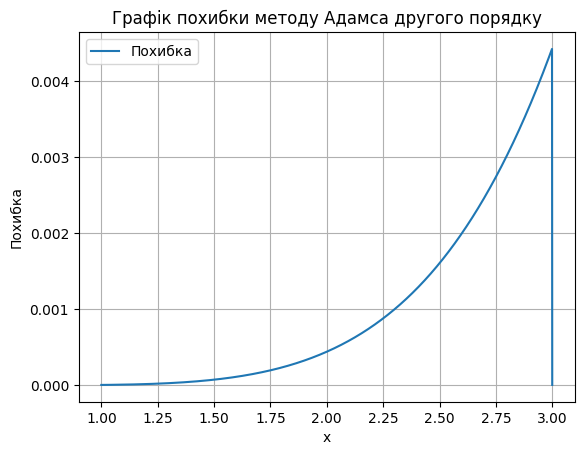

In [11]:
plt.plot(x, local_errors, label='Похибка')
plt.xlabel('x')
plt.ylabel('Похибка')
plt.title('Графік похибки методу Адамса другого порядку')
plt.legend()
plt.grid(True)
plt.show()

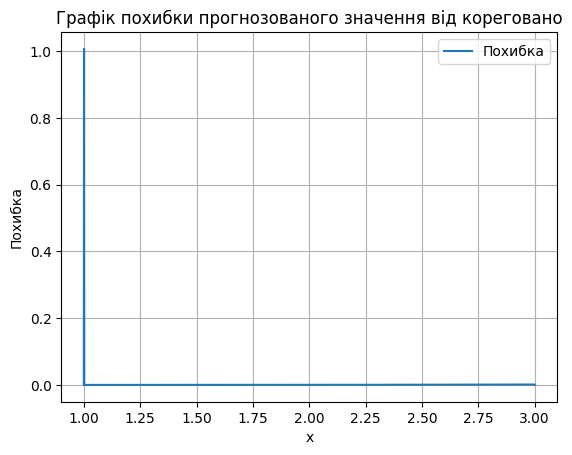

In [12]:
plt.plot(x, local_errors_pr_kor, label='Похибка')
plt.xlabel('x')
plt.ylabel('Похибка')
plt.title('Графік похибки прогнозованого значення від кореговано')
plt.legend()
plt.grid(True)
plt.show()

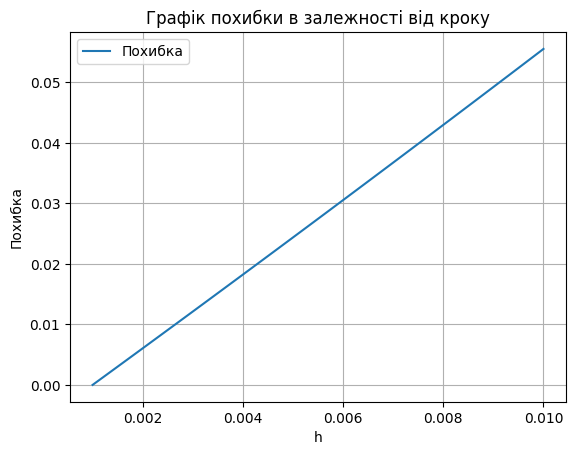

In [15]:
plt.plot(hh, errors, label='Похибка')
plt.xlabel('h')
plt.ylabel('Похибка')
plt.title('Графік похибки в залежності від кроку')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
optimal_step

0.001